This notebook explains the resoning behind why we have chosen to investigated further curraletion between crime x and y.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First we repeat work done in a week 5 when we had to plot pairwise comparison between each crime for amount of crime in the hours of the weel.

In [2]:
crime_data = pd.read_csv('data/crime_data.csv')
focuscrimes = ['weapon laws', 'prostitution', 'DUI', 'robbery', 'burglary', 'assault', 'drunkenness', 'DV', 
'trespass', 'larceny/theft', 'vandalism', 'vehicle theft', 'stolen property', 'disorderly conduct']
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%Y-%m-%d', errors='coerce')

In [3]:
#adding new column to the data with hour of the week
crime_data['week_h'] = (pd.to_datetime(crime_data['Time'], format='%H:%M', errors='coerce').dt.hour+1) * (crime_data['Date'].dt.dayofweek + 1)
week_hours = list(range(1,169))
crime_data['week_h'].max()

np.int32(168)

In [12]:
#creting a dictionary with crime categories, hour of the week and amount of crime in the hour.
crime_counts = {}
for crime in focuscrimes:
    filtered_data = crime_data[crime_data['Category'] == crime]
    crime_counts[crime] = filtered_data['week_h'].value_counts().reindex(week_hours, fill_value=0)

#for better visual representation of correlation, let's standardize crime count 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


crime_counts = {crime: scaler.fit_transform(np.array(counts).reshape(-1, 1)).flatten() 
                     for crime, counts in crime_counts.items()}

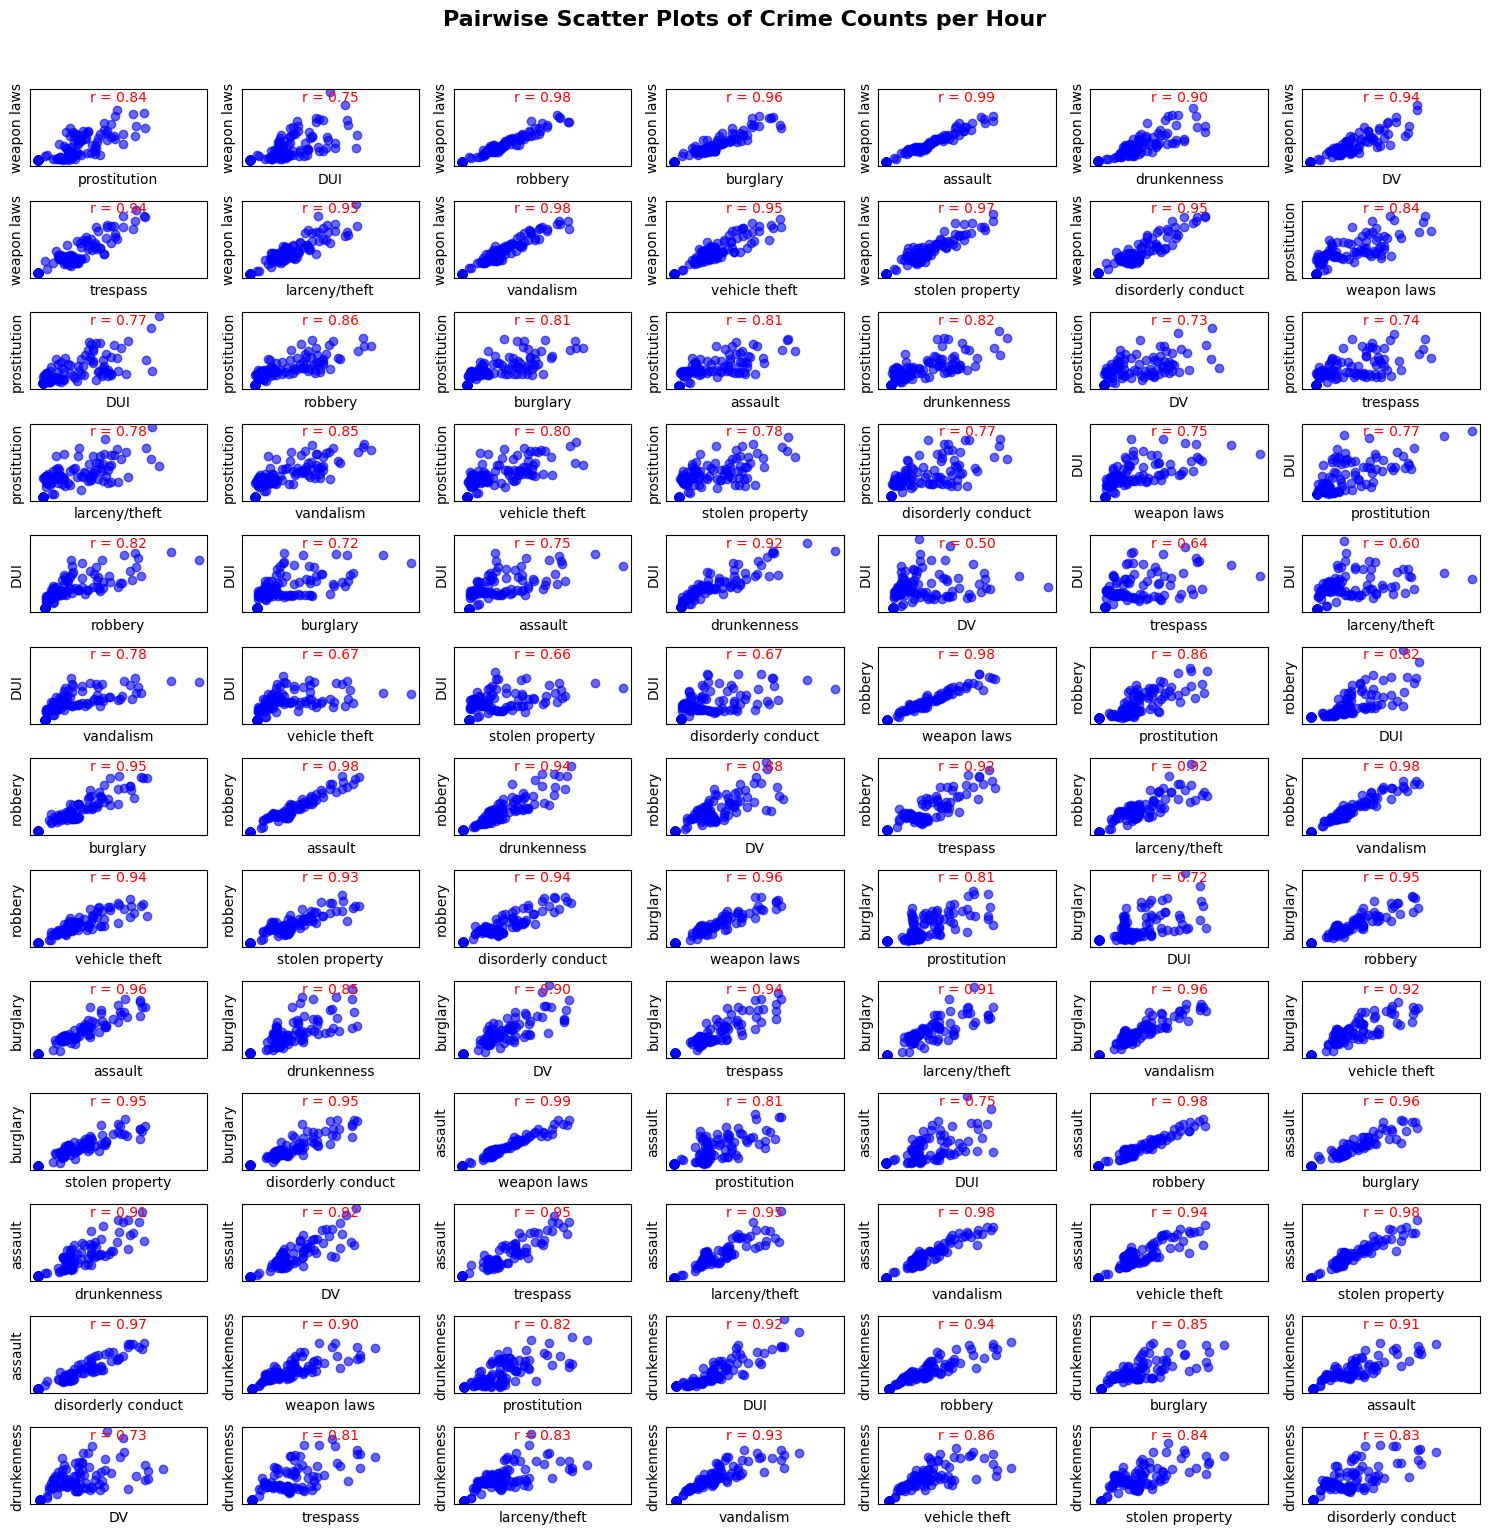

In [17]:
#Pairwise comparison with included Pearson correlation index
import scipy.stats

fig, axes = plt.subplots(13, 7, figsize=(15, 15), sharex='col', sharey='row')
axes = axes.flatten()

plot_index = 0  # Index to track the position of the plot


for i, crime1 in enumerate(focuscrimes):
    for j, crime2 in enumerate(focuscrimes):
        if crime1 != crime2:  # Skip diagonal plots (i == j)
            ax = axes[plot_index]
            x = crime_counts[crime1]
            y = crime_counts[crime2]

            # Scatter plot
            ax.scatter(x, y, alpha=0.6, color='blue')

            # Calculate and display Pearson correlation coefficient
            r, _ = scipy.stats.pearsonr(x, y)
            ax.text(0.5, 0.9, f"r = {r:.2f}", transform=ax.transAxes, 
                    ha='center', va='center', fontsize=10, color='red')

            # Remove axis ticks and set labels
            ax.set_xticks([])
            ax.set_yticks([]) 
            ax.set_ylabel(crime1)
            ax.set_xlabel(crime2)

            plot_index += 1  # Move to the next plot

        if plot_index >= len(axes):  # Stop once we've filled all axes
            break
    if plot_index >= len(axes):  # Stop once we've filled all axes
        break

plt.suptitle("Pairwise Scatter Plots of Crime Counts per Hour", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In general, there is a positive correlation trnd between each pair of 14 focus crimes. The strongest correlation is within this group: weapon laws, robbery, burglary, drunkenness, assault and vandalism. There are other high correlations like between tresspass and disortderly conduct, but we will not focus on them.

Here is also a Correlation matrix to summarize correlations

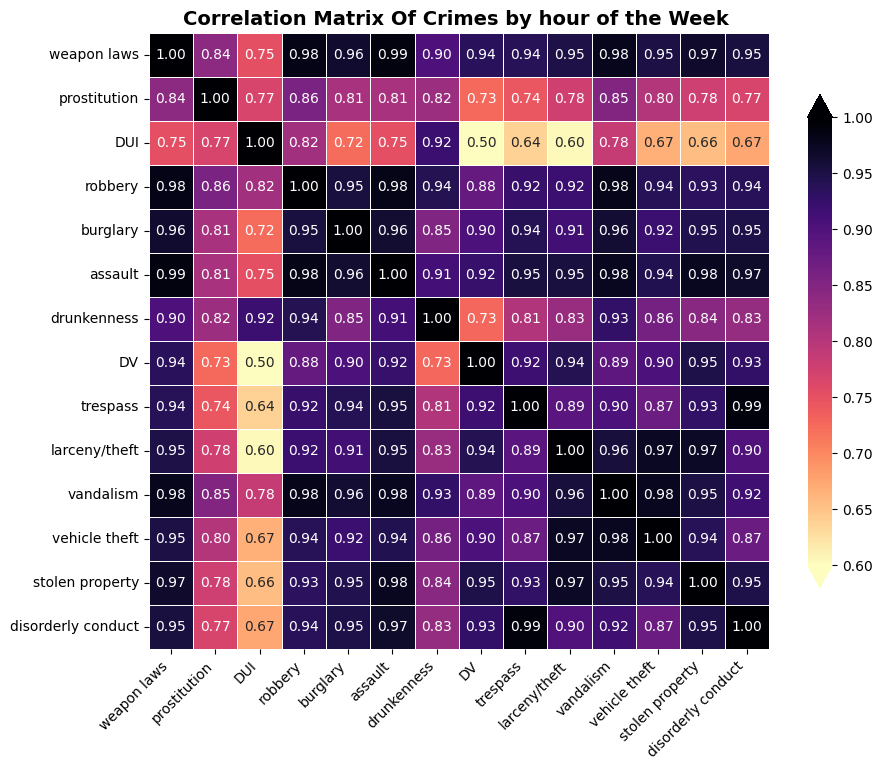

In [26]:
#Overview of correlation coeficinets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dictionary to DataFrame
crime_df = pd.DataFrame(crime_counts)

# Compute correlation matrix
correlation_matrix = crime_df[focuscrimes].corr(method='pearson')

# Plot heatmap with contrast focused on 0.6 - 1 range
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, fmt=".2f", cmap="magma_r", center=0.8, 
    vmin=0.6, vmax=1, linewidths=0.5, 
    cbar_kws={'shrink': 0.8, 'extend': 'both'}, ax=ax
)

# Title and layout
plt.title( "Correlation Matrix Of Crimes by hour of the Week ", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()



As a result, we want to dive into high correaltion group weapon laws, robbery, burglary, drunkenness, assault and vandalism.